In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3',
                              'LP_lag_3_per','PO_lag_1_per-3','GMV_lag_3_per'], axis=1)

GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"15,747,089.60","72,093,251.50",0.00,0.00,0.12,0.06,-0.26,-0.16,0.12,0.06
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.05,0.05,0.14,-0.10,-0.05,0.05
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.11,0.05,-0.21,-0.10,0.11,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.06,-0.05,0.13,0.11,-0.06,-0.05
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.01,-0.08,-0.02,0.23,0.01,-0.08


In [5]:
GamingAccessory['LP_lag_1_per'] = GamingAccessory['LP_lag_1_per'].fillna(0)
GamingAccessory['LP_lag_2_per'] = GamingAccessory['LP_lag_2_per'].fillna(0)

GamingAccessory['PO_lag_1_per-1'] = GamingAccessory['PO_lag_1_per-1'].fillna(0)
GamingAccessory['PO_lag_1_per-2'] = GamingAccessory['PO_lag_1_per-2'].fillna(0)

GamingAccessory['GMV_lag_1_per'] = GamingAccessory['GMV_lag_1_per'].fillna(0)
GamingAccessory['GMV_lag_2_per'] = GamingAccessory['GMV_lag_2_per'].fillna(0)

In [6]:
GamingAccessory['PO_lag_1_per-1'] = GamingAccessory['PO_lag_1_per-1'].replace([np.inf, -np.inf], 0)

In [7]:
GamingAccessory['PO_lag_1_per-2'] = GamingAccessory['PO_lag_1_per-2'].replace([np.inf, -np.inf], 0)

In [8]:
GamingAccessory = GamingAccessory.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,LP_lag_1_per,LP_lag_2_per,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"15,747,089.60","72,093,251.50",0.00,0.00,0.12,0.06,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.05,0.05,0.14,-0.10,-0.05,0.05
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"27,557,406.80","126,163,190.13",0.00,0.00,0.11,0.05,-0.21,-0.10,0.11,0.05
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.06,-0.05,0.13,0.11,-0.06,-0.05
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"30,509,986.10","139,680,674.78",0.00,0.00,0.01,-0.08,-0.02,0.23,0.01,-0.08


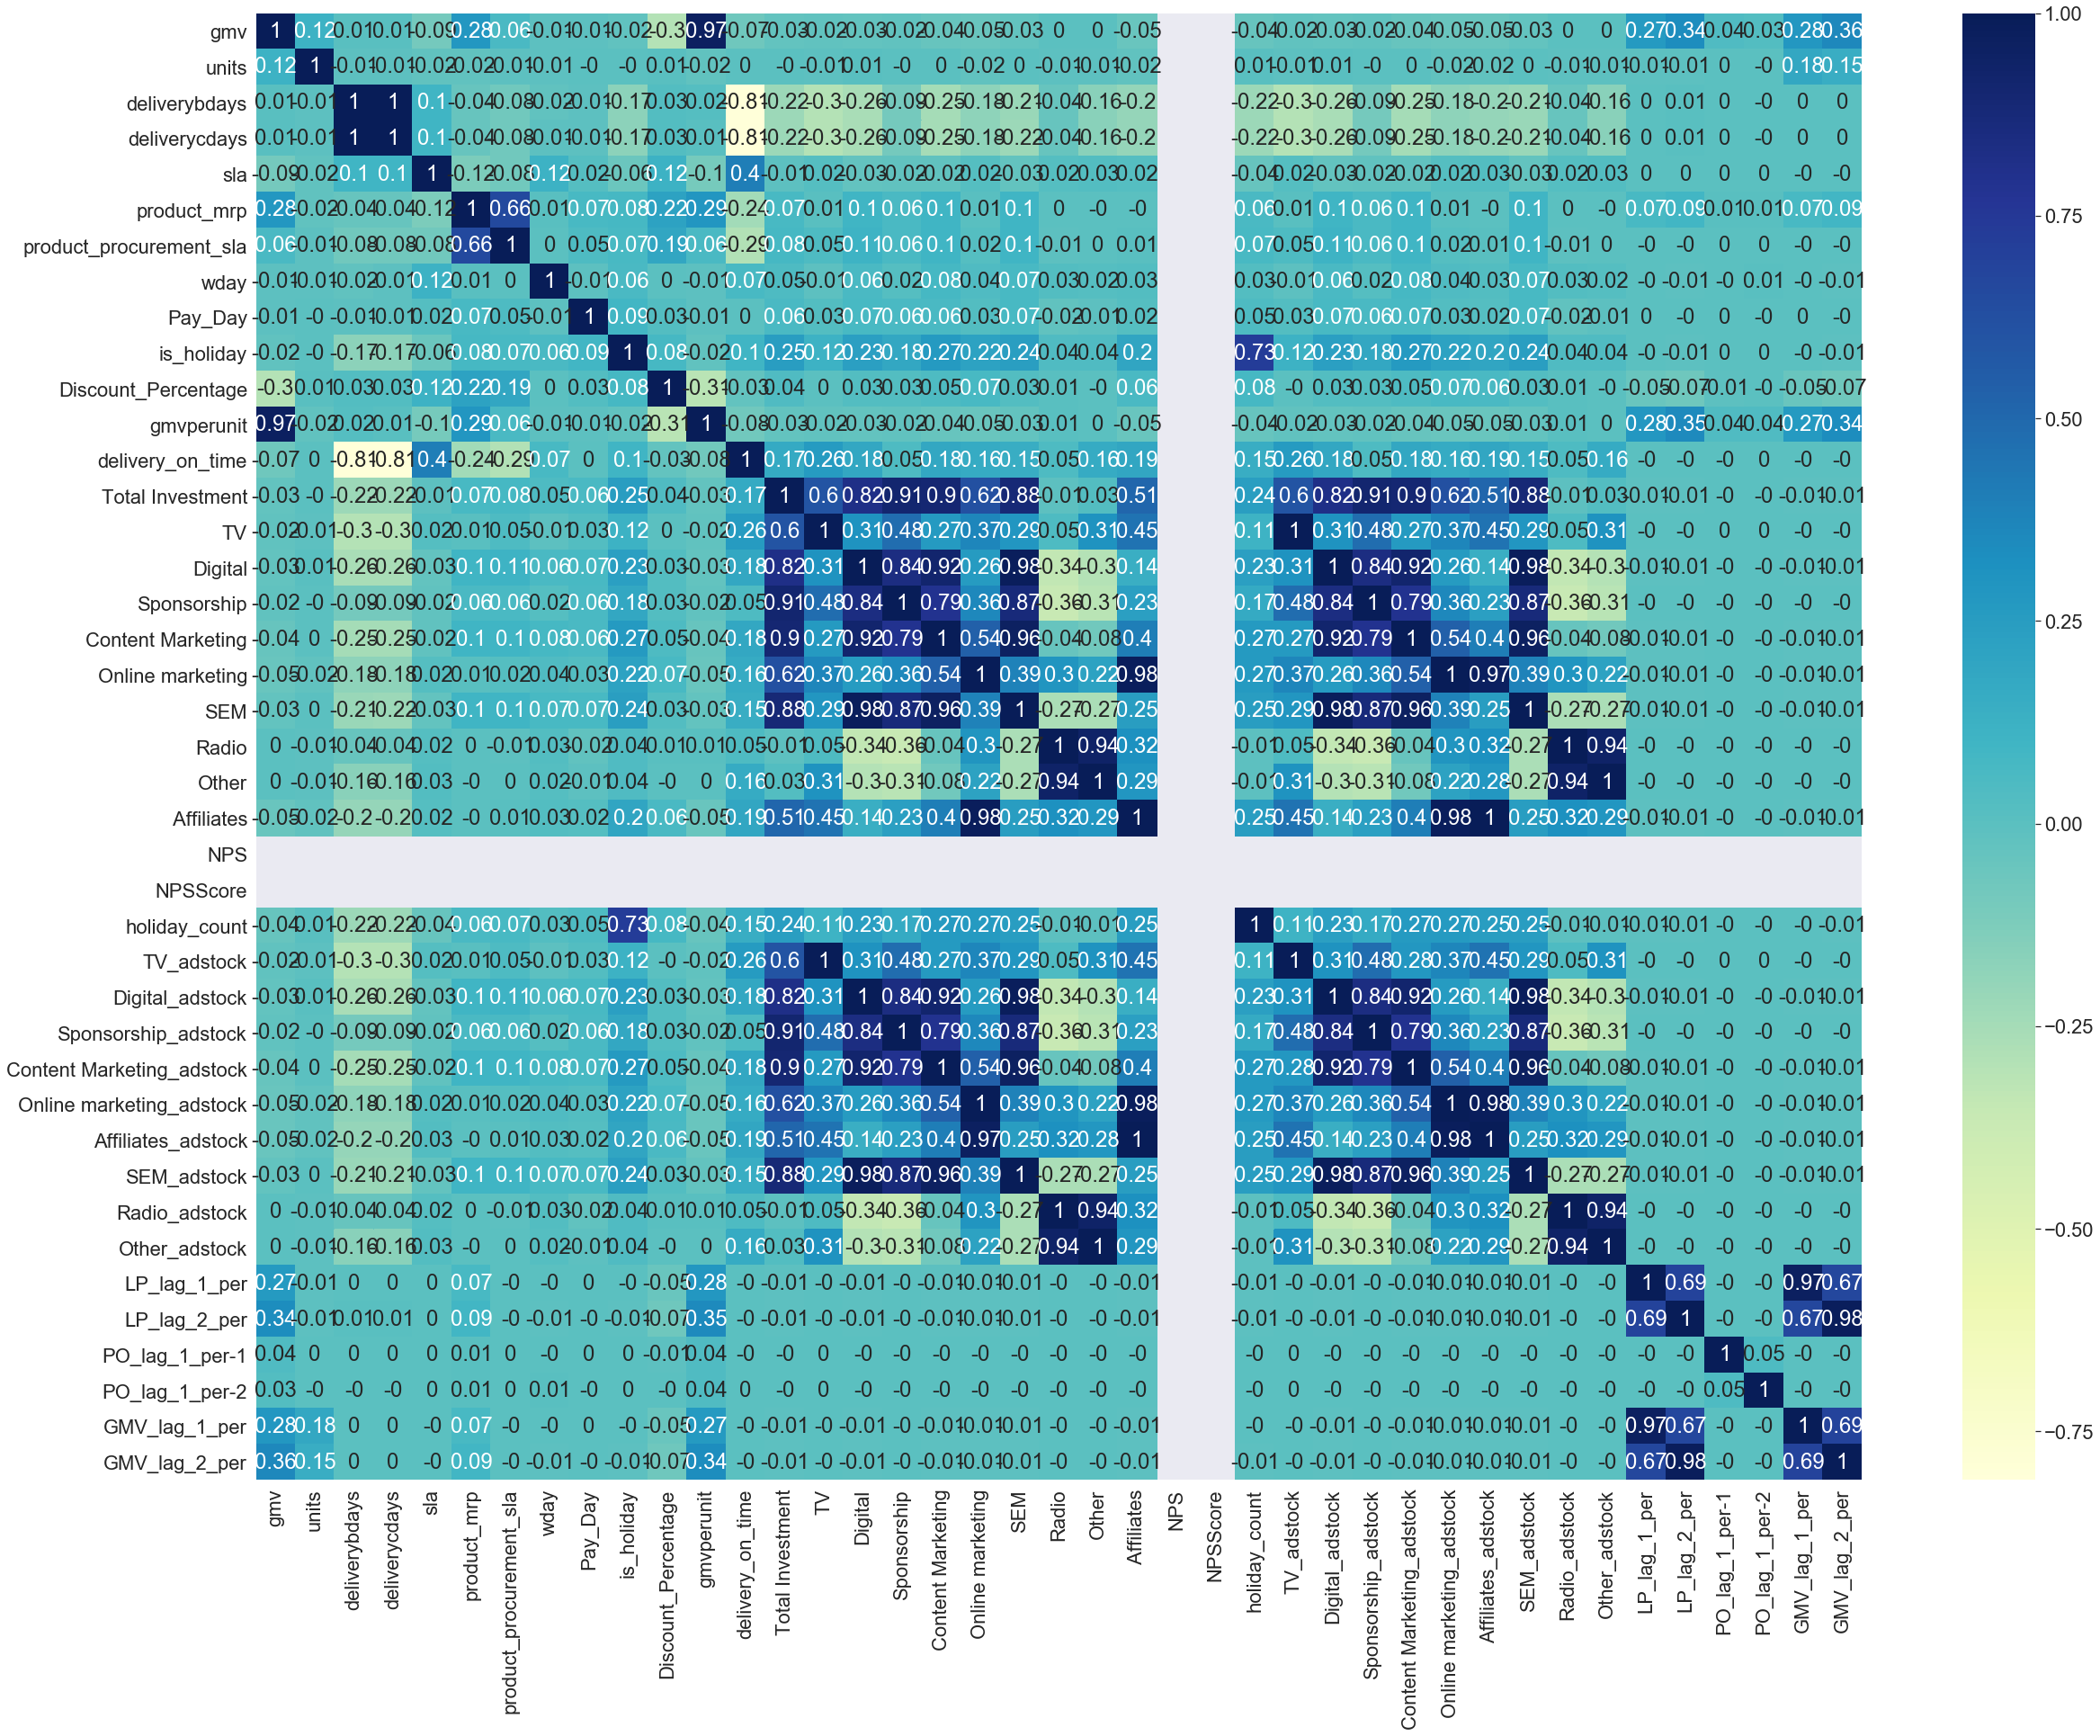

In [9]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [10]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock', 
                              'LP_lag_1_per', 'LP_lag_2_per'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",nan,nan,0.00,Luxury,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,0.14,-0.10,-0.05,0.05
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.21,-0.10,0.11,0.05
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",nan,nan,4.00,Luxury,0.13,0.11,-0.06,-0.05
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",nan,nan,0.00,Luxury,-0.02,0.23,0.01,-0.08


In [11]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType', 'PO_lag_1_per-1', 'PO_lag_1_per-2',
       'GMV_lag_1_per', 'GMV_lag_2_per'],
      dtype='object')

In [12]:
GamingAccessory.isnull().sum()

gmv                                   0
units                                 0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
wday                                  0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0
Radio                                 0


In [13]:
GamingAccessory['NPS'] = GamingAccessory['NPS'].fillna(0)
GamingAccessory['NPSScore'] = GamingAccessory['NPSScore'].fillna(0)

In [14]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
NPSScore            

In [15]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [16]:
GamingAccessory.shape

(170712, 35)

In [17]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,0.07,0.20,46.18,...,"1,172,797.93","11,904,502.32","13,684,660.51",0.00,0.00,1.15,0.16,0.21,0.09,0.13
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,0.25,0.40,22.97,...,"1,964,867.99","20,597,714.25","4,006,399.16",0.00,0.00,1.65,8.79,9.59,1.28,1.61
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,"166,383.18",0.00,0.00,0.00,-1.00,-1.00,-0.99,-0.99
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,0.00,0.00,29.07,...,0.00,0.00,"14,039,892.47",0.00,0.00,0.00,0.00,-0.01,0.00,-0.01
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,0.00,0.00,45.67,...,0.00,0.00,"15,390,121.96",0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,0.00,0.00,62.63,...,"1,964,516.13","11,260,967.74","15,605,218.38",0.00,0.00,3.00,0.00,0.00,0.00,0.01
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,1.00,1.00,98.60,...,"6,096,774.19","61,170,967.74","16,641,935.48",0.00,0.00,6.00,"2,998.00","2,998.00",174.85,174.87


In [18]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [19]:
#Delivery time can't be negative hence taking positive values
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,-0.12,0.00,0.05,0.00


In [20]:
GamingAccessory.shape

(106810, 35)

In [21]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [22]:
#Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.12,0.00,0.05,0.00


In [23]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns), axis=1)

In [25]:
GamingAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,PO_lag_1_per-1,PO_lag_1_per-2,GMV_lag_1_per,GMV_lag_2_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.26,-0.16,0.12,0.06
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.14,-0.10,-0.05,0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.25,0.36,-0.08,-0.11
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.16,-0.26,0.06,0.12
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.12,0.00,0.05,0.00


In [26]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0,0,0,0,0,0,1,0,0,0


In [27]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 54 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   Pay_Day                                          106810 non-null  int64  
 8   is_holiday                                       106810 non-null  int64  
 9   Discount_Percen

In [28]:
# missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing                                   False
SEM                            

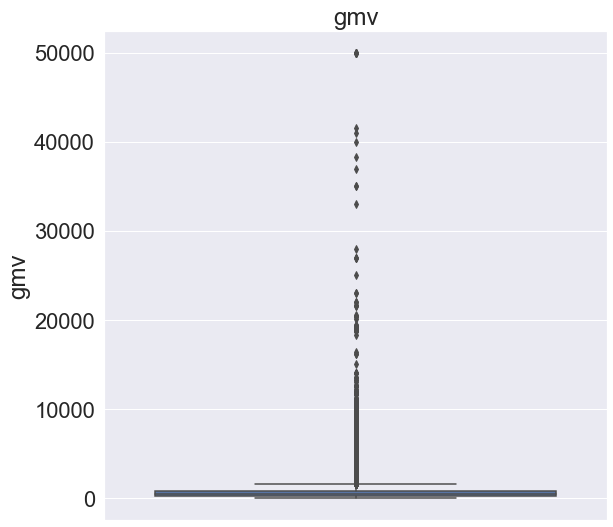

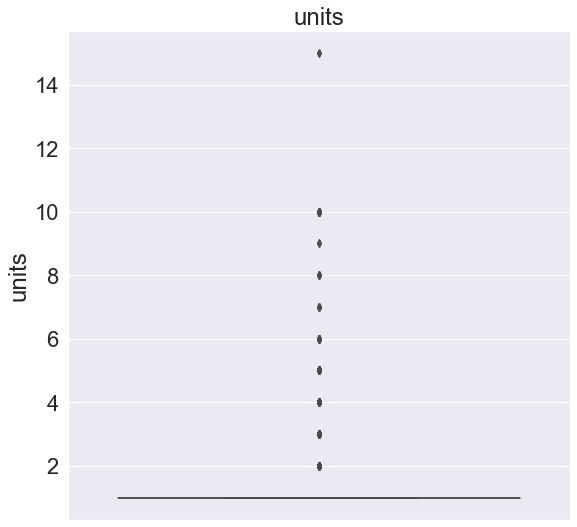

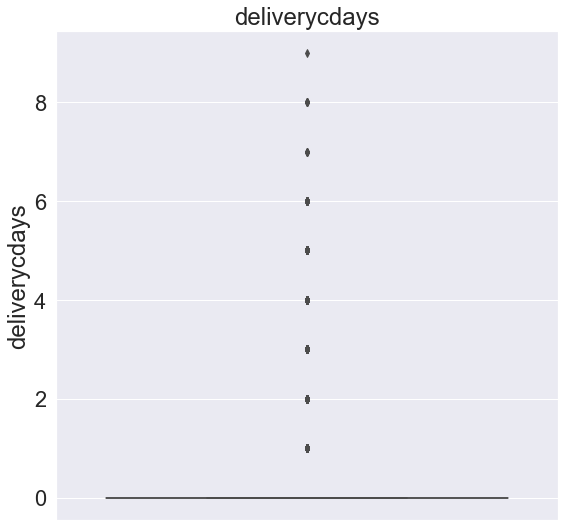

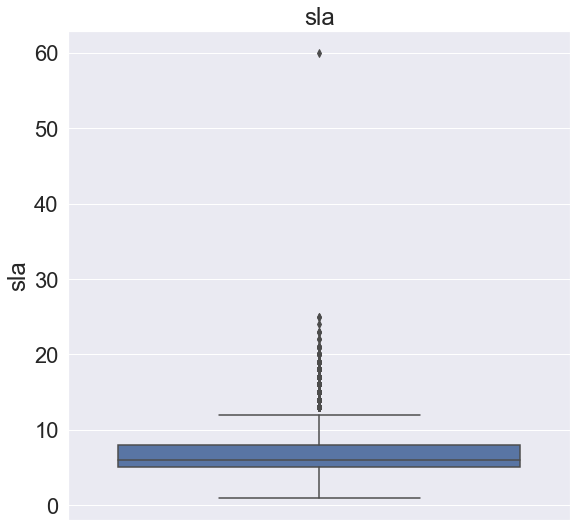

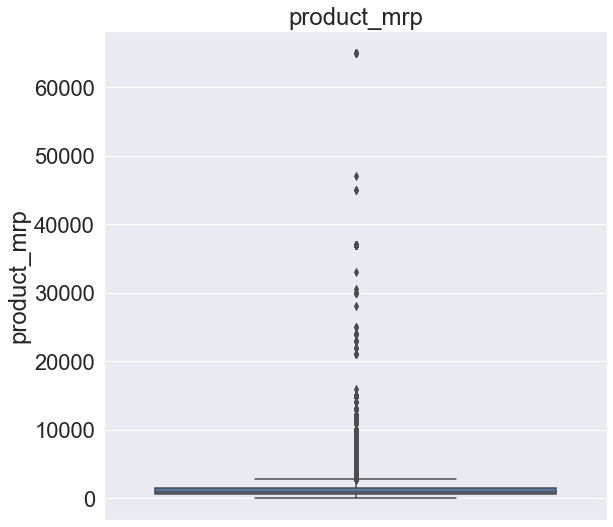

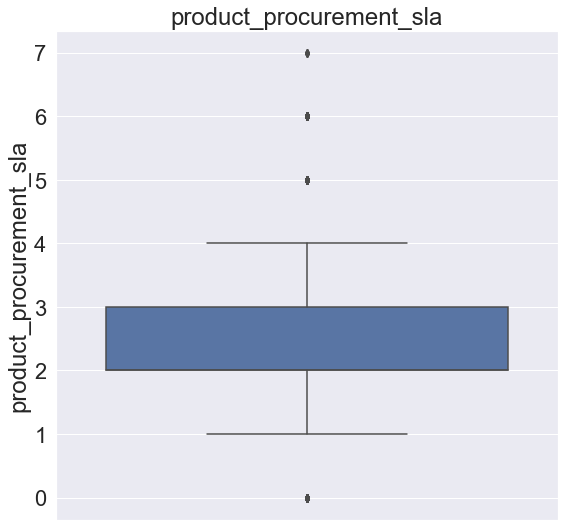

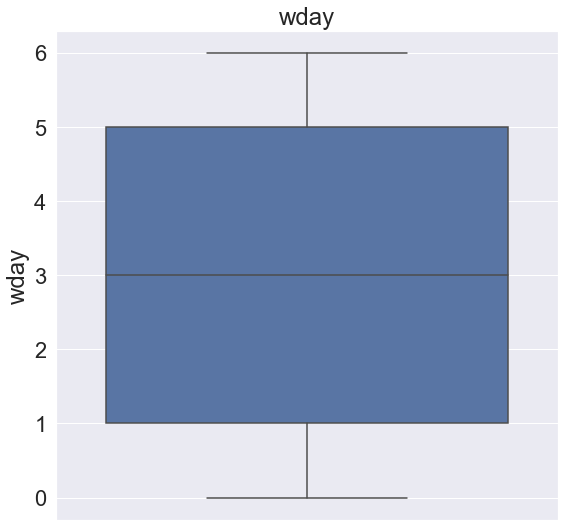

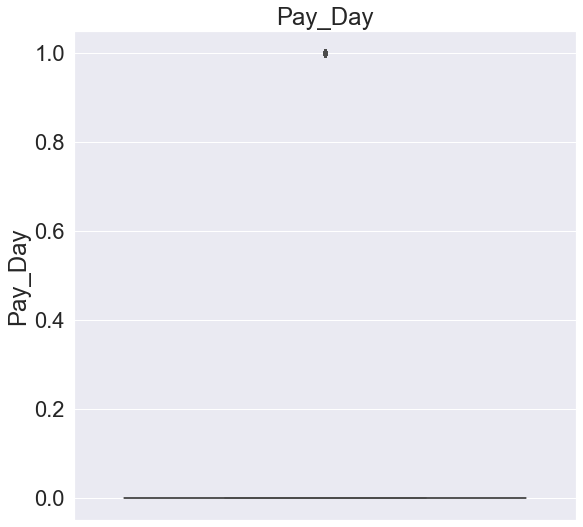

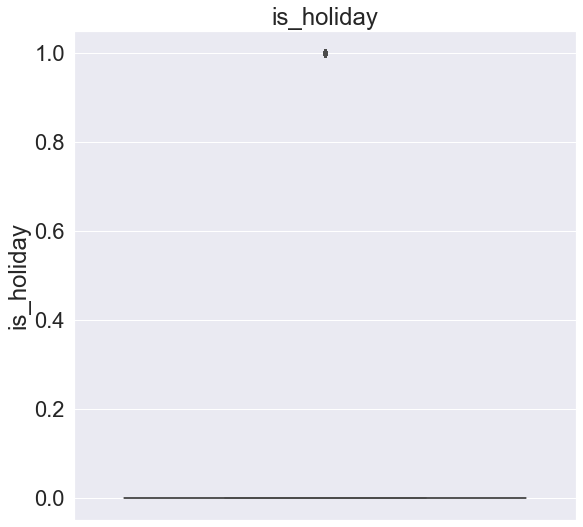

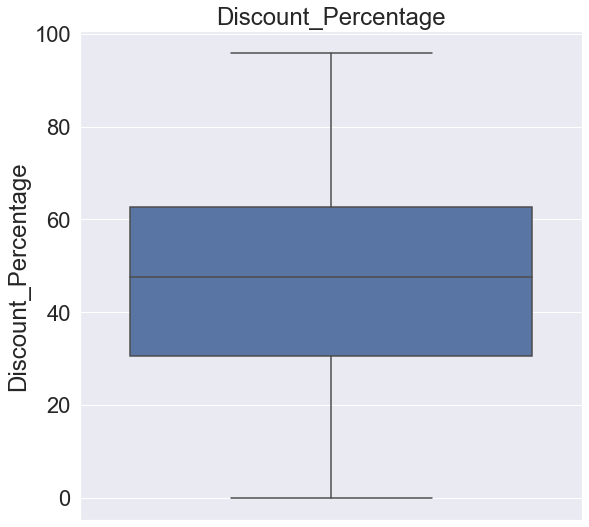

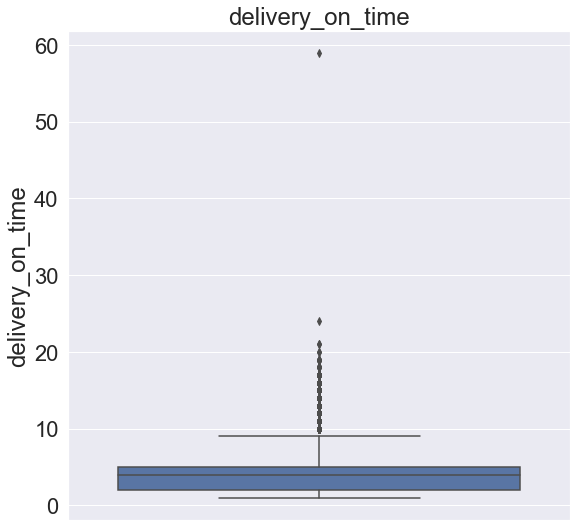

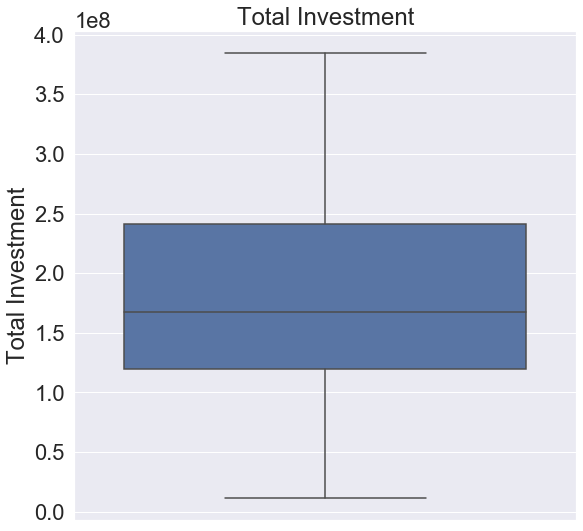

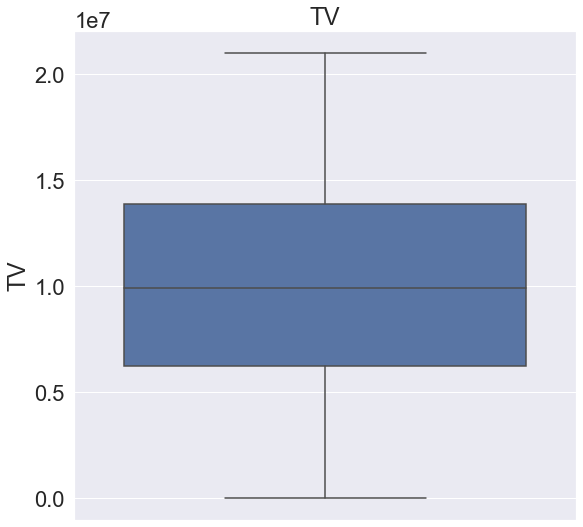

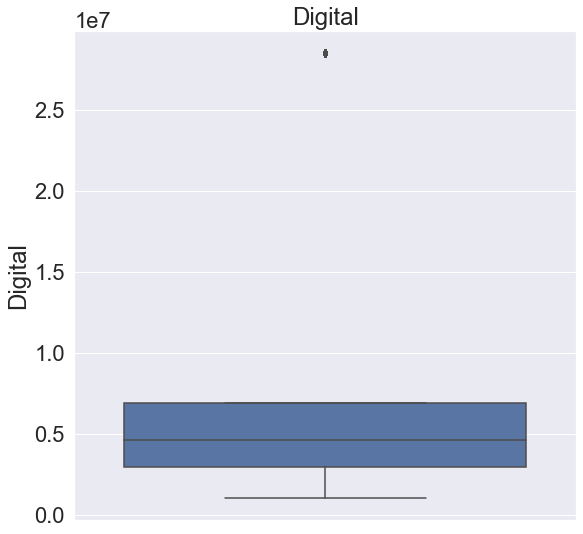

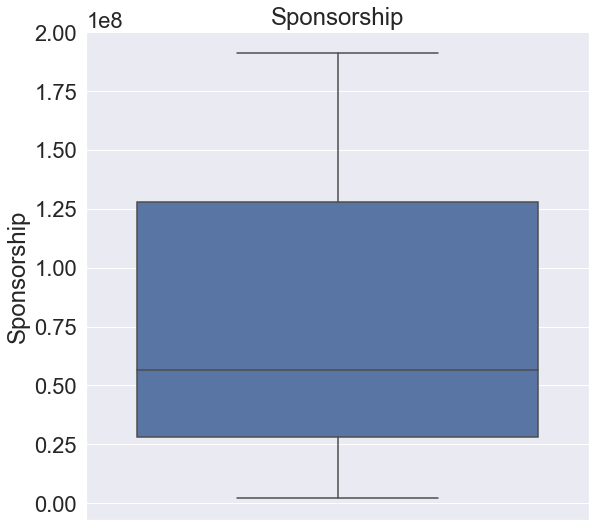

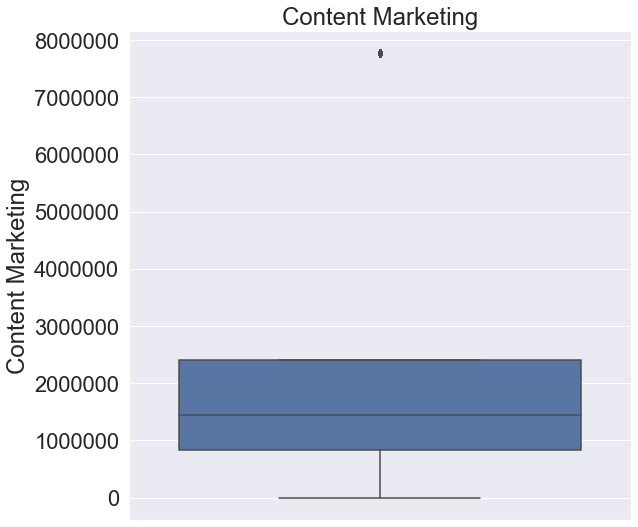

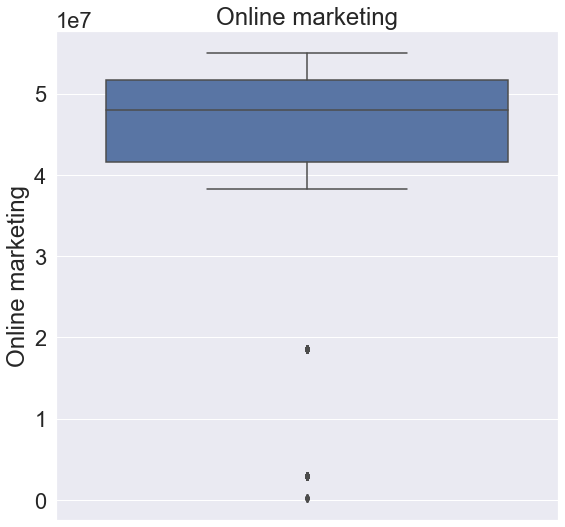

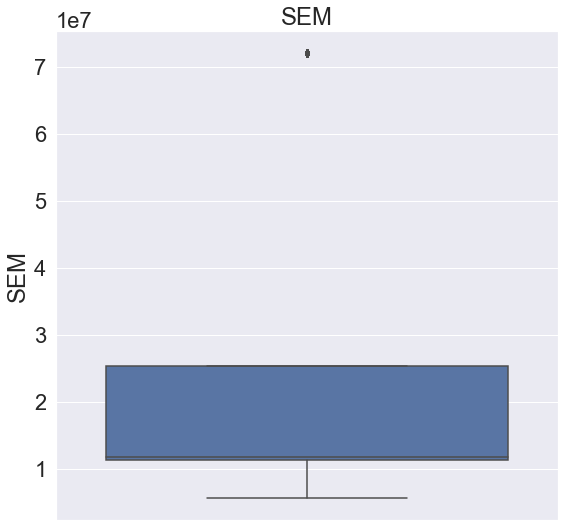

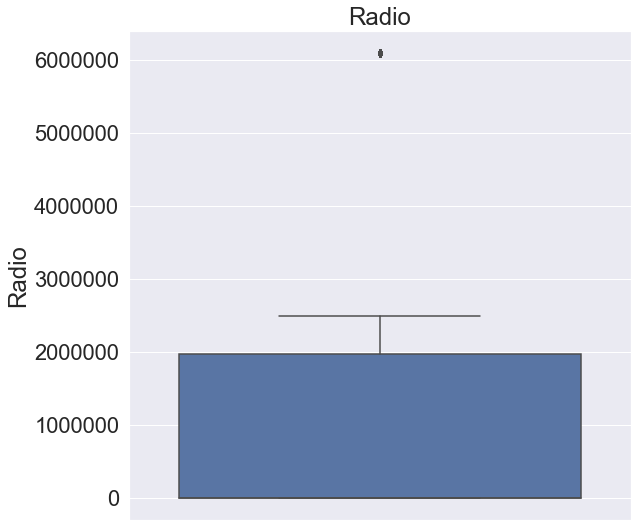

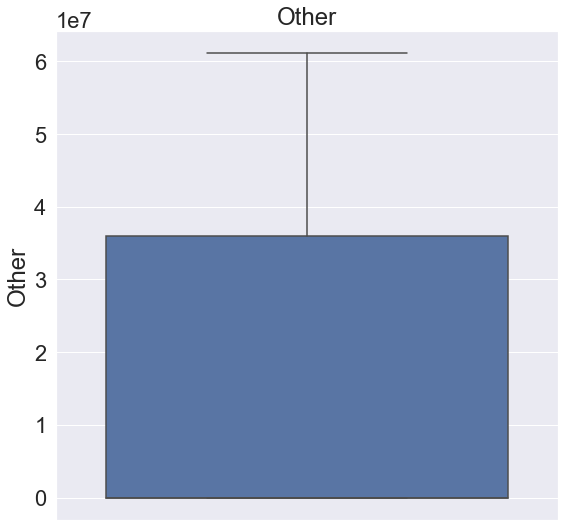

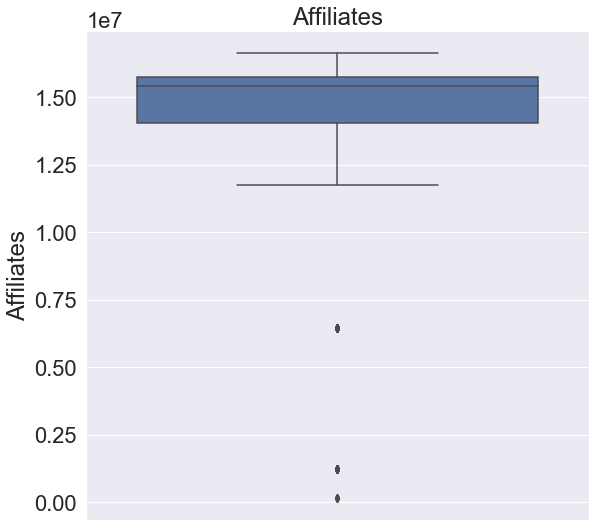

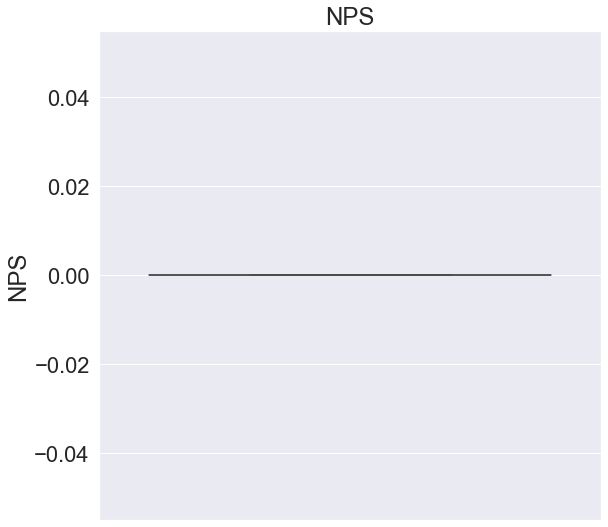

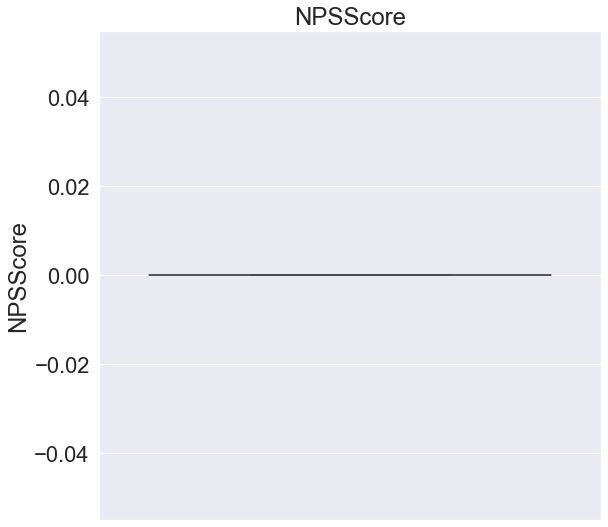

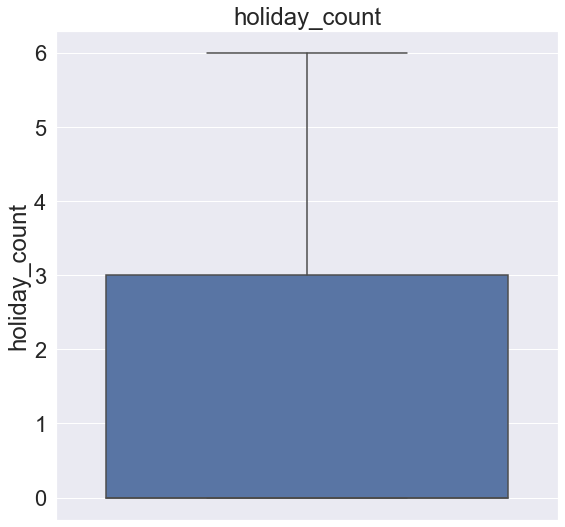

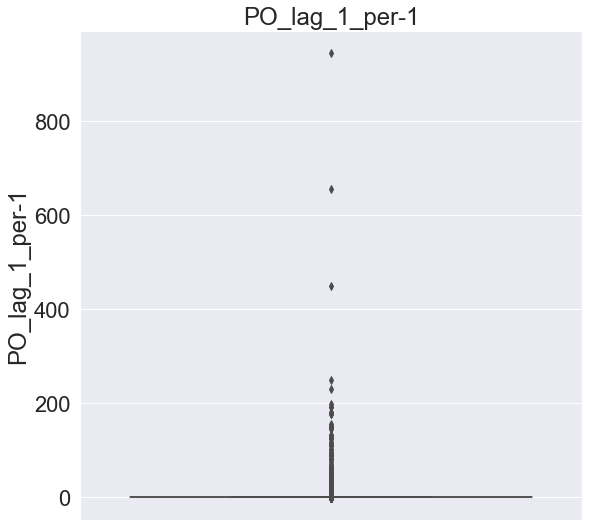

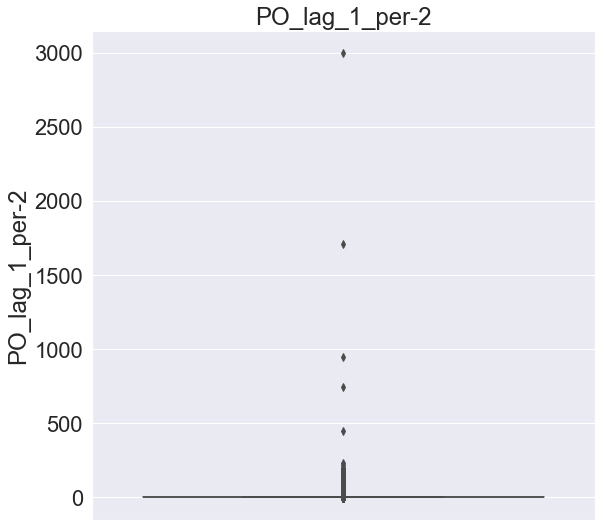

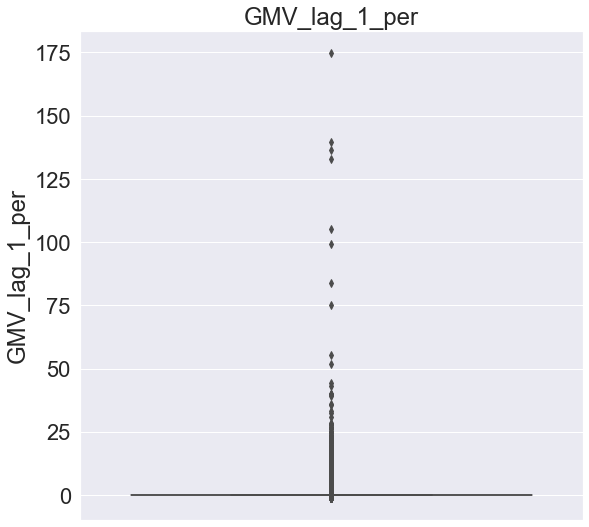

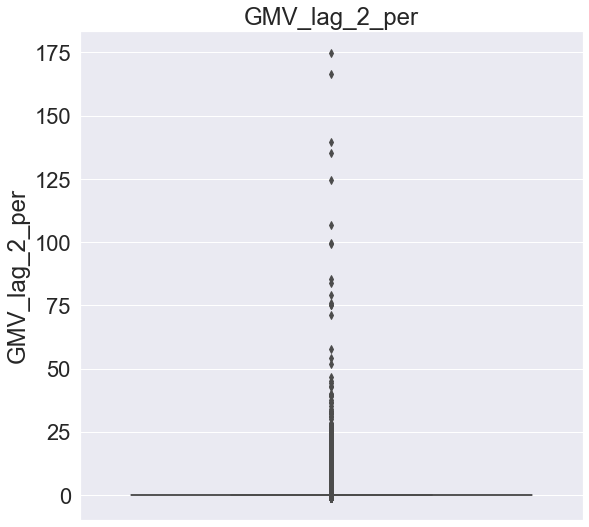

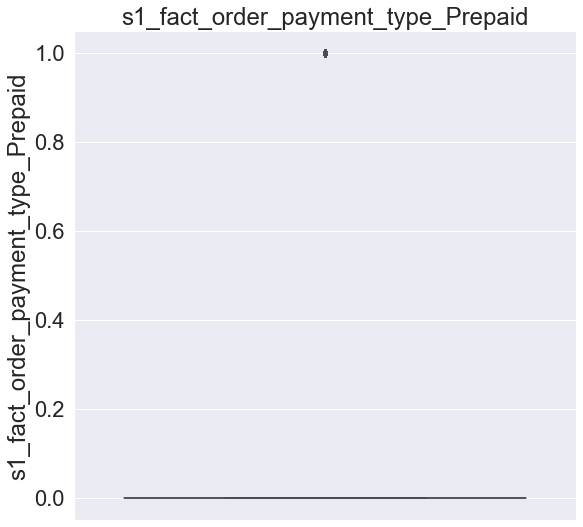

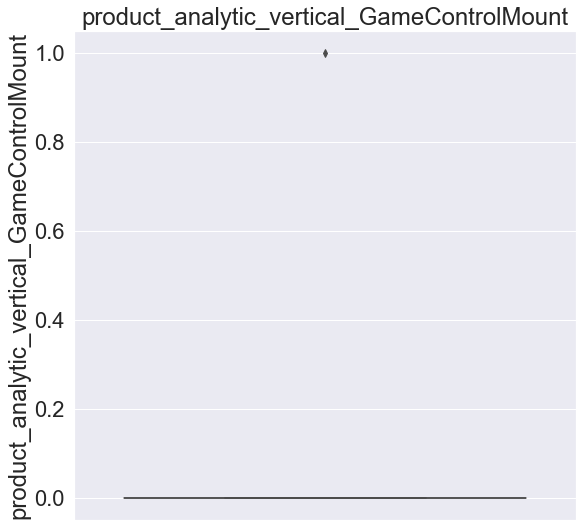

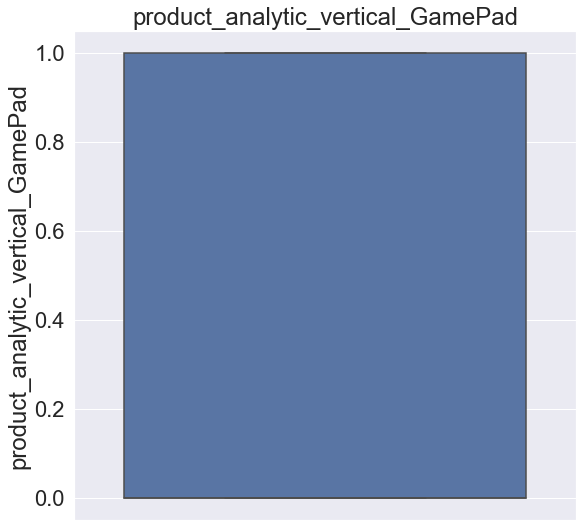

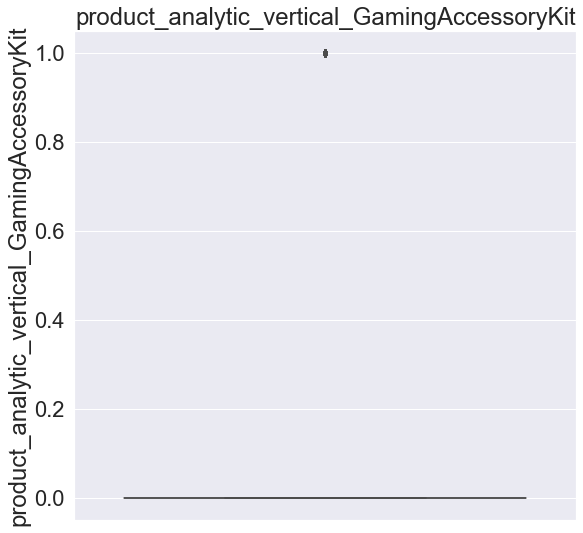

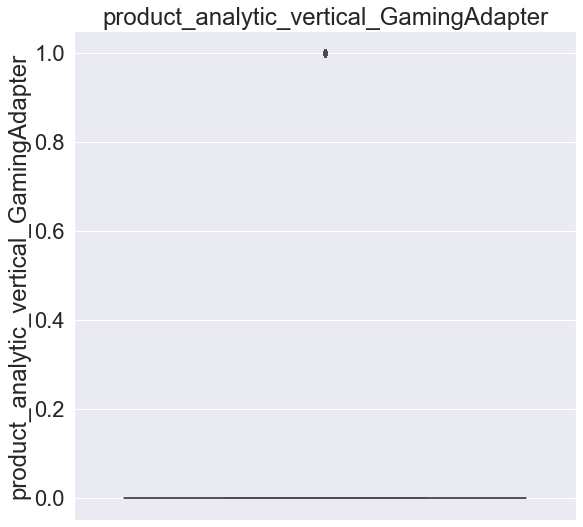

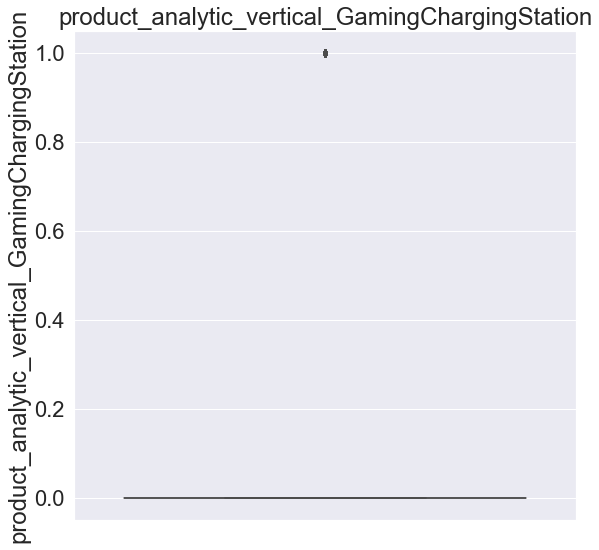

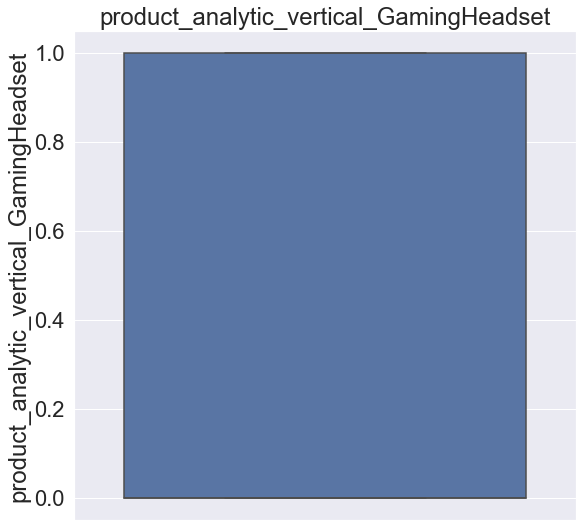

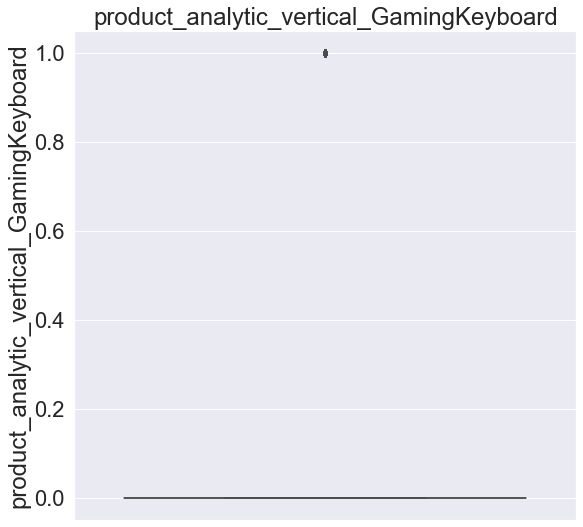

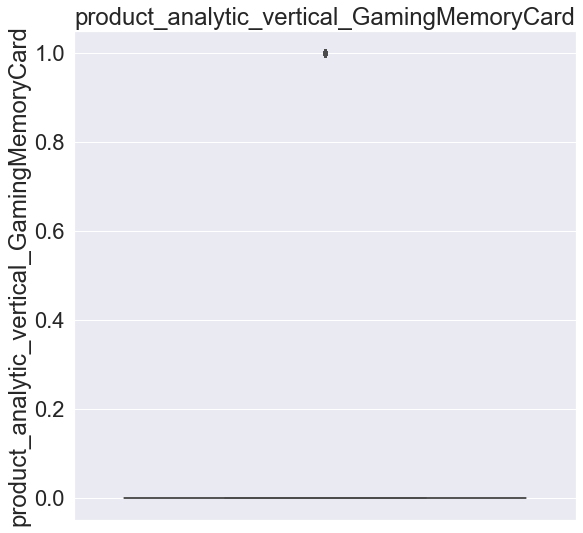

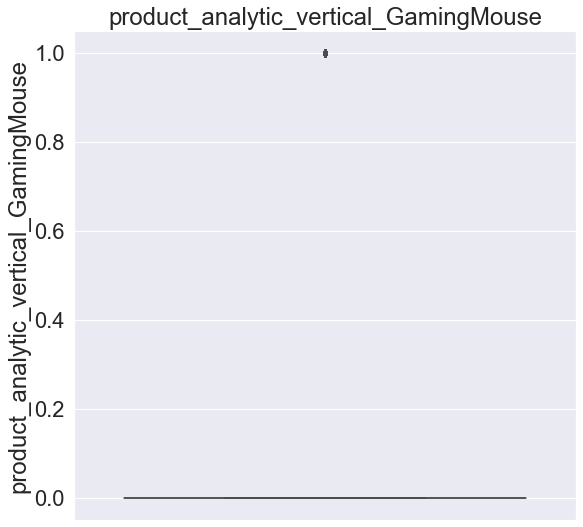

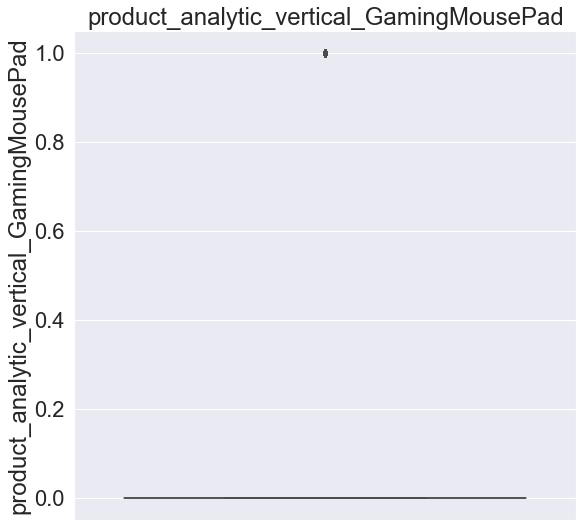

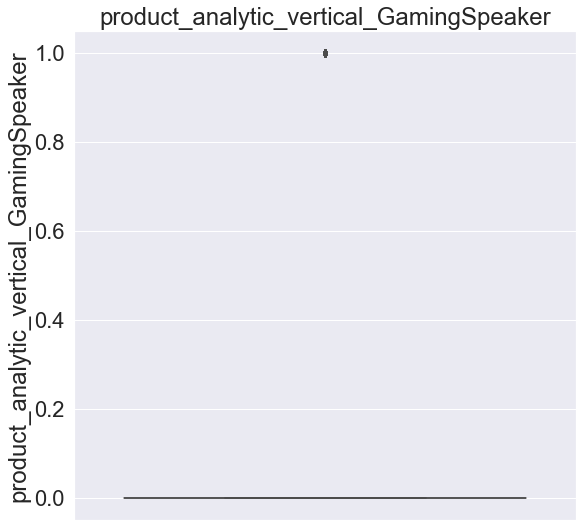

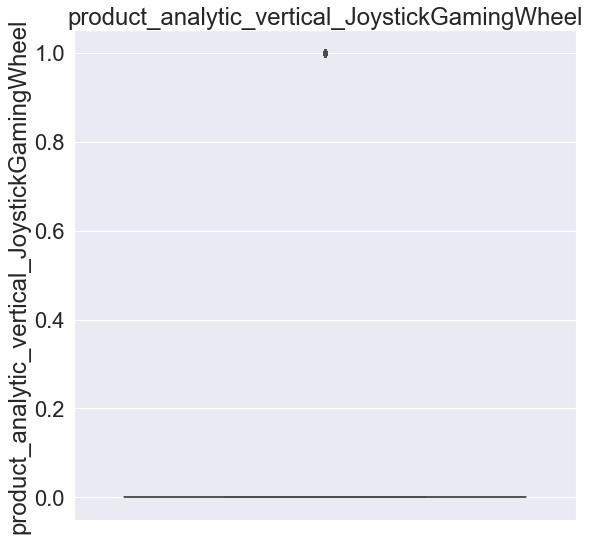

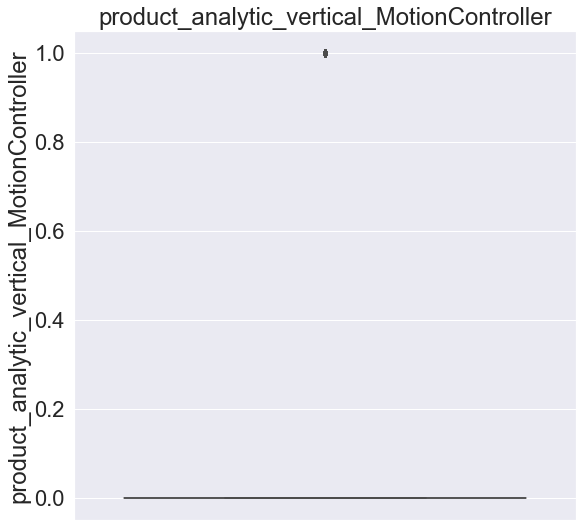

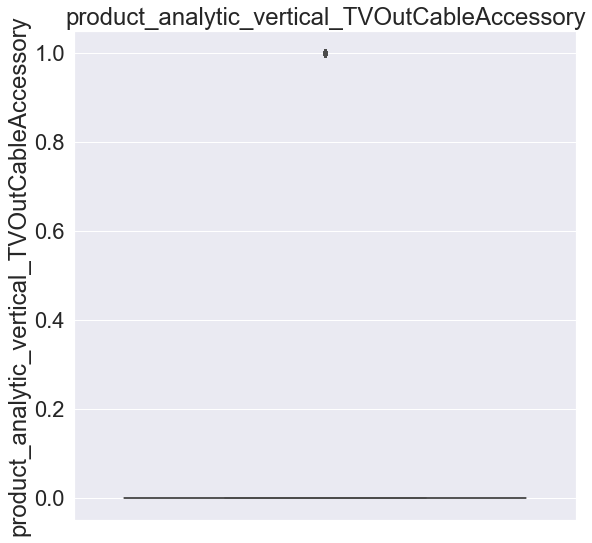

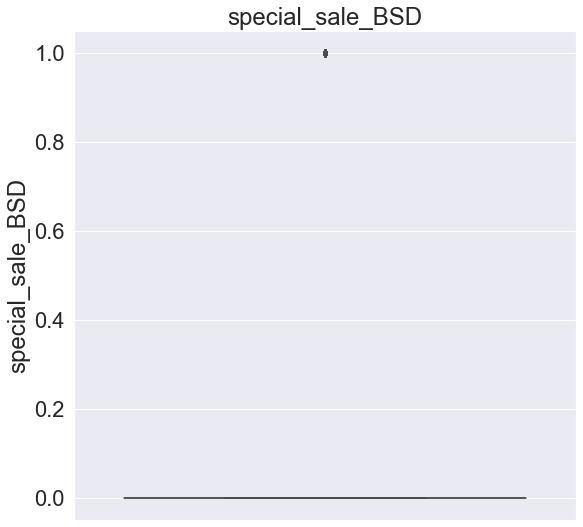

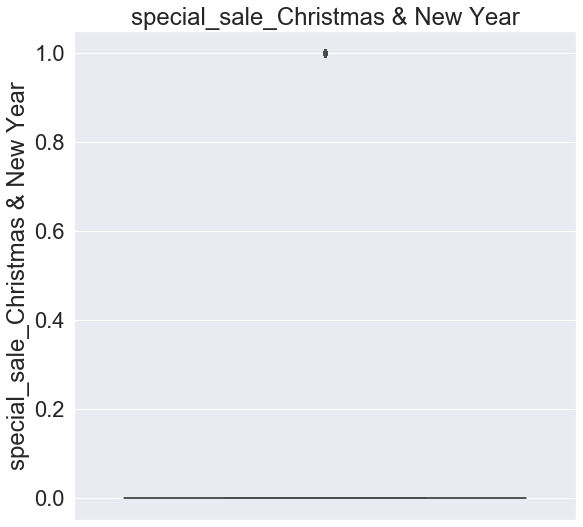

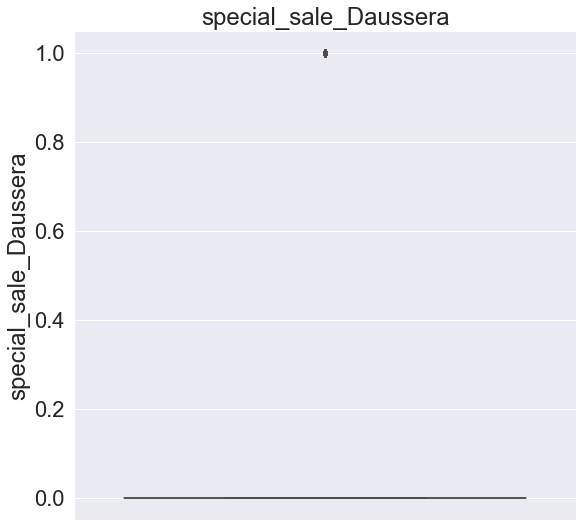

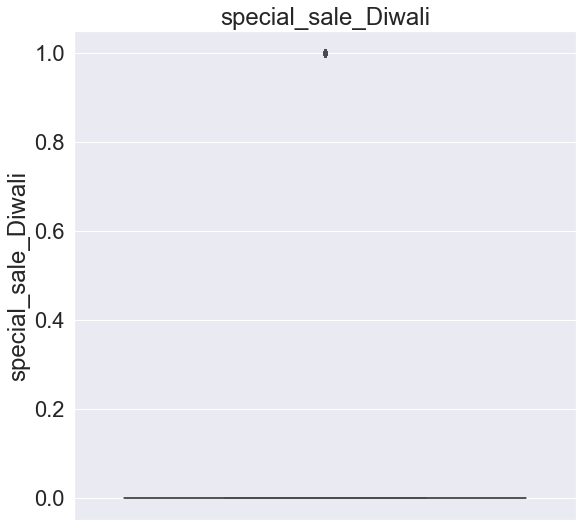

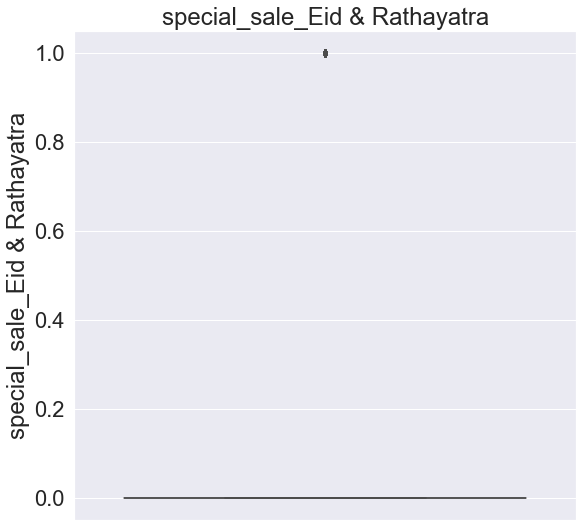

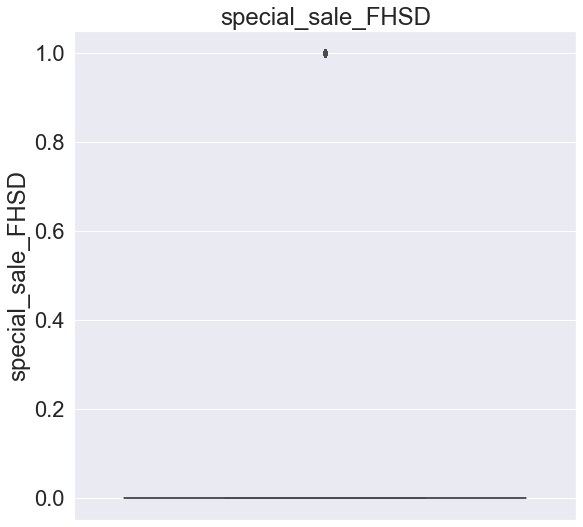

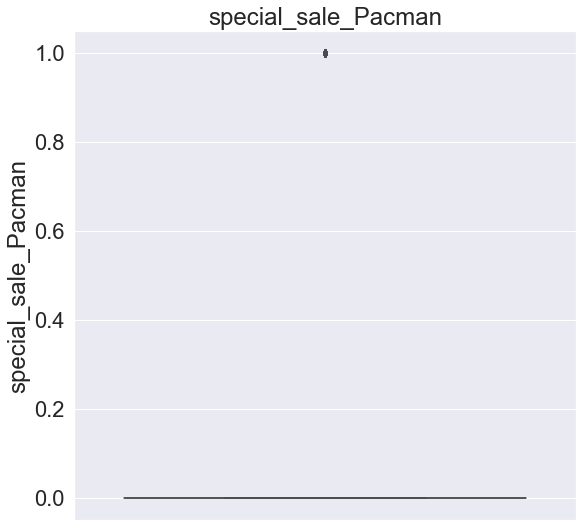

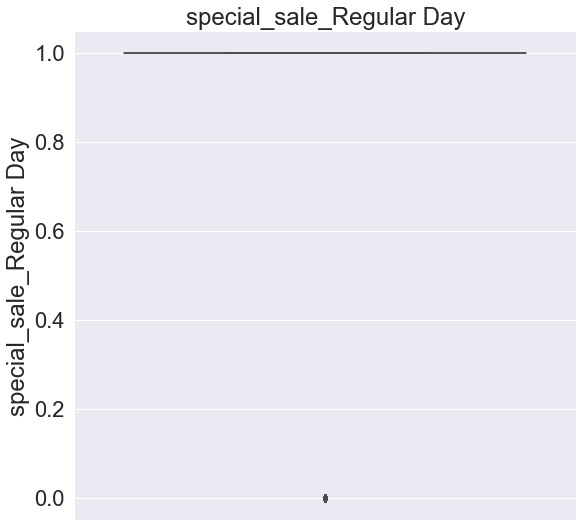

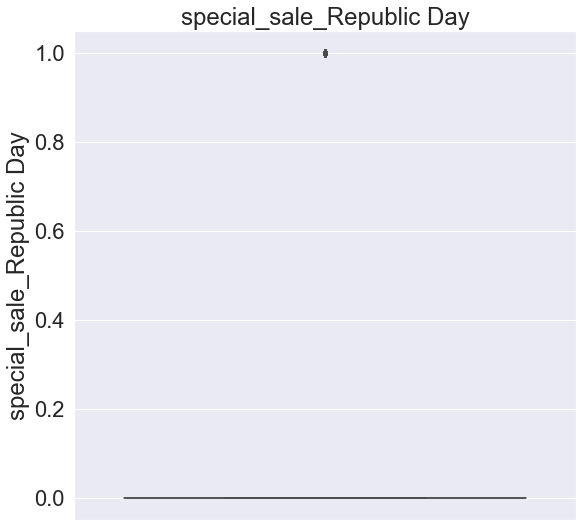

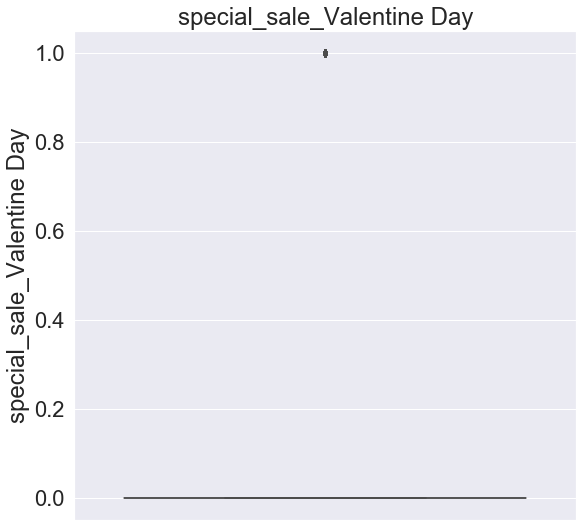

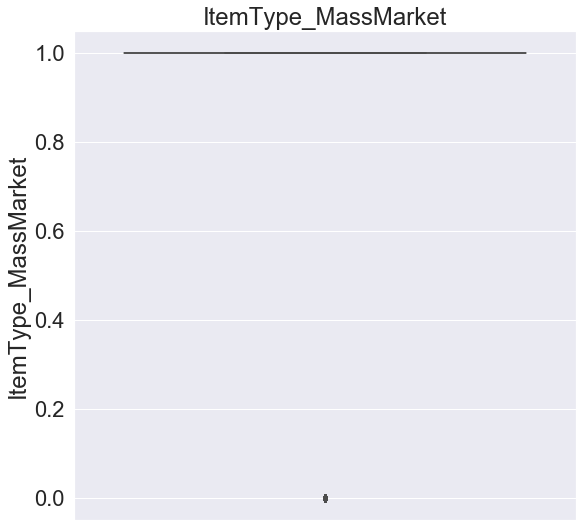

In [29]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)

In [30]:
GA.shape

(106810, 54)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 54 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   Pay_Day                                          106810 non-null  int64  
 8   is_holiday                                       106810 non-null  int64  
 9   Discount_Percen

In [36]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [37]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in GA.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [38]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [39]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0,0,0.72,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0,1,0.47,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0,0,0.33,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0,0,0.73,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0,1,0.62,...,1,0,0,0,0,0,0,0,0,1


In [40]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [41]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.42190591e-01 -2.30510481e-02  3.13439039e-02  7.61264239e-01
 -6.76209965e-03  2.36754684e-05  1.75942582e-04 -7.28265053e-04
 -2.50712826e-02 -2.68896898e-02 -1.11947280e+00  5.12945769e-02
  9.57519743e-02  5.77185716e-01  9.90009976e-03  1.33360785e-01
  1.97940347e-01  1.54671891e-02  1.91104882e-01  8.60899156e-02
 -9.55957535e-13  1.25138788e-12 -1.22100477e-05 -6.23446620e-03
 -1.08464634e-02  2.27119865e-02  1.26562341e-01 -4.34780938e-05
  8.45104555e-04 -1.77074591e-03  3.54856532e-04  7.11572772e-04
 -6.50405154e-04 -5.43442365e-04 -3.74990903e-04  4.33612808e-04
 -6.26386456e-04 -8.96322222e-04 -1.16413901e-02  2.67864572e-03
  1.42682736e-03 -1.01916943e-03  9.58913808e-04 -5.55740947e-04
  6.55187720e-04  7.54704426e-04  1.42068421e-03  8.26132947e-04
  1.25098509e-03 -2.37539620e-04  1.37068218e-03  6.95895037e-04
 -1.27122214e-02]
0.0135075522172165


In [43]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True False False False False  True False  True  True
  True  True False  True  True False  True  True False False False False
 False  True  True False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True]
[ 1  6  4  1  7 36 34 25  1  5  1  1  1  1  9  1  1  2  1  1 39 38 37  8
  3  1  1 35 12 13 17 14 29 31 32 16 30 28  1 10 11 27 20 26 24 23 18 21
 19 33 15 22  1]


In [44]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Discount_Percentage,Total Investment,TV,Digital,Sponsorship,Online marketing,SEM,Other,Affiliates,GMV_lag_1_per,GMV_lag_2_per,product_analytic_vertical_GamingSpeaker,ItemType_MassMarket
36102,1.00,0.00,0.03,0.72,0.62,0.58,0.21,0.67,0.92,0.29,0.00,0.93,0.01,0.01,0,1
98899,1.00,0.00,0.03,0.47,0.58,1.00,0.14,0.48,0.76,0.09,0.59,0.84,0.01,0.00,0,1
93860,1.00,0.07,0.00,0.33,0.58,1.00,0.14,0.48,0.76,0.09,0.59,0.84,0.01,0.01,0,1
637,1.00,0.00,0.03,0.73,1.00,0.66,1.00,1.00,1.00,1.00,0.00,0.95,0.01,0.01,0,1
41231,1.00,0.00,0.02,0.62,0.62,0.58,0.21,0.67,0.92,0.29,0.00,0.93,0.01,0.00,0,1


In [45]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.820e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:43:37   Log-Likelihood:             2.6295e+05
No. Observations:               74767   AIC:                        -5.259e+05
Df Residuals:                   74751   BIC:                        -5.257e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [48]:
#Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Total Investment,"1,100,480.28"
7,Sponsorship,"472,189.89"
10,Other,"80,842.31"
9,SEM,"63,799.36"
8,Online marketing,"15,077.86"
6,Digital,"9,835.02"
11,Affiliates,"5,242.82"
5,TV,"1,611.75"
0,const,"1,132.17"
13,GMV_lag_2_per,2.04


In [49]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 5.163e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:43:48   Log-Likelihood:             2.6295e+05
No. Observations:               74767   AIC:                        -5.259e+05
Df Residuals:                   74752   BIC:                        -5.257e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0210      0.000     88.186      0.000       0.021       0.022
units                                       0.1396      0.001     97.749      0.000       0.137       0.142
product_mrp                                 0.7588      0.001    515.849      0.000       0.756       0.762
Discount_Percentage                        -0.0241      0.000   -201.937      0.000      -0.024      -0.024
TV                                         -0.0005      0.001     -0.663      0.507      -0.002       0.001
Digital                                     0.0059      0.001      7.164      0.000       0.004       0.007
Sponsorship                                 0.0005      0.001      0.603      0.547      -0.001       0.002
Online marketing                           -0.0096      0.003     -2.964      0.003      -0.016      -0.003
SEM                                        -0.0047      0.001     -4.742      0.000      -0.007      -0.003
Other                                      -0.0003      0.000     -1.048      0.294      -0.001       0.000
Affiliates                                  0.0105      0.003      3.248      0.001       0.004       0.017
GMV_lag_1_per                               0.0242      0.005      5.094      0.000       0.015       0.034
GMV_lag_2_per                               0.1346      0.004     37.102      0.000       0.128       0.142
product_analytic_vertical_GamingSpeaker    -0.0111      0.001    -20.225      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0129      0.000    -84.087      0.000      -0.013      -0.013
==============================================================================
Omnibus:                    92377.794   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        337165521.096
Skew:                           5.586   Prob(JB):                         0.00
Kurtosis:                     331.792   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Online marketing,820.33
10,Affiliates,793.03
8,SEM,148.19
6,Sponsorship,107.07
5,Digital,101.25
0,const,82.50
4,TV,49.28
9,Other,12.42
12,GMV_lag_2_per,2.04
11,GMV_lag_1_per,1.94


In [51]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 5.559e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:43:55   Log-Likelihood:             2.6294e+05
No. Observations:               74767   AIC:                        -5.258e+05
Df Residuals:                   74753   BIC:                        -5.257e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0215      0.000     96.531      0.000       0.021       0.022
units                                       0.1396      0.001     97.695      0.000       0.137       0.142
product_mrp                                 0.7587      0.001    515.755      0.000       0.756       0.762
Discount_Percentage                        -0.0240      0.000   -202.073      0.000      -0.024      -0.024
TV                                          0.0005      0.001      0.768      0.442      -0.001       0.002
Digital                                     0.0021      0.000     11.979      0.000       0.002       0.002
Sponsorship                                -0.0008      0.001     -1.033      0.302      -0.002       0.001
Online marketing                           -0.0096      0.003     -2.974      0.003      -0.016      -0.003
Other                                      -0.0006      0.000     -2.494      0.013      -0.001      -0.000
Affiliates                                  0.0098      0.003      3.035      0.002       0.003       0.016
GMV_lag_1_per                               0.0243      0.005      5.100      0.000       0.015       0.034
GMV_lag_2_per                               0.1348      0.004     37.142      0.000       0.128       0.142
product_analytic_vertical_GamingSpeaker    -0.0111      0.001    -20.217      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0129      0.000    -84.139      0.000      -0.013      -0.013
==============================================================================
Omnibus:                    92450.081   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        337776443.585
Skew:                           5.594   Prob(JB):                         0.00
Kurtosis:                     332.090   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Online marketing,820.32
9,Affiliates,791.39
6,Sponsorship,95.23
0,const,71.55
4,TV,45.00
8,Other,11.42
5,Digital,4.51
11,GMV_lag_2_per,2.04
10,GMV_lag_1_per,1.94
2,product_mrp,1.90


In [53]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 6.021e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:44:01   Log-Likelihood:             2.6293e+05
No. Observations:               74767   AIC:                        -5.258e+05
Df Residuals:                   74754   BIC:                        -5.257e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0218      0.000    116.409      0.000       0.021       0.022
units                                       0.1396      0.001     97.682      0.000       0.137       0.142
product_mrp                                 0.7587      0.001    515.735      0.000       0.756       0.762
Discount_Percentage                        -0.0240      0.000   -202.040      0.000      -0.024      -0.024
TV                                          0.0025      0.000     14.234      0.000       0.002       0.003
Digital                                     0.0021      0.000     12.296      0.000       0.002       0.002
Sponsorship                                -0.0030      0.000    -13.876      0.000      -0.003      -0.003
Other                                      -0.0012    9.8e-05    -12.533      0.000      -0.001      -0.001
Affiliates                                  0.0002      0.000      1.595      0.111   -4.73e-05       0.000
GMV_lag_1_per                               0.0243      0.005      5.104      0.000       0.015       0.034
GMV_lag_2_per                               0.1349      0.004     37.159      0.000       0.128       0.142
product_analytic_vertical_GamingSpeaker    -0.0111      0.001    -20.197      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0129      0.000    -84.128      0.000      -0.013      -0.013
==============================================================================
Omnibus:                    92484.820   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        338281984.837
Skew:                           5.599   Prob(JB):                         0.00
Kurtosis:                     332.336   Cond. No.                         389.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,50.84
6,Sponsorship,7.48
5,Digital,4.48
4,TV,2.95
10,GMV_lag_2_per,2.04
7,Other,1.97
9,GMV_lag_1_per,1.94
2,product_mrp,1.90
12,ItemType_MassMarket,1.81
8,Affiliates,1.26


In [55]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 6.550e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:44:05   Log-Likelihood:             2.6284e+05
No. Observations:               74767   AIC:                        -5.256e+05
Df Residuals:                   74755   BIC:                        -5.255e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0219      0.000    117.029      0.000       0.022       0.022
units                                       0.1395      0.001     97.507      0.000       0.137       0.142
product_mrp                                 0.7576      0.001    515.054      0.000       0.755       0.761
Discount_Percentage                        -0.0241      0.000   -202.292      0.000      -0.024      -0.024
TV                                          0.0008      0.000      6.328      0.000       0.001       0.001
Digital                                     0.0001   9.69e-05      1.436      0.151   -5.08e-05       0.000
Other                                      -0.0005    8.5e-05     -6.466      0.000      -0.001      -0.000
Affiliates                                  0.0002      0.000      1.321      0.186   -8.28e-05       0.000
GMV_lag_1_per                               0.0245      0.005      5.138      0.000       0.015       0.034
GMV_lag_2_per                               0.1351      0.004     37.187      0.000       0.128       0.142
product_analytic_vertical_GamingSpeaker    -0.0112      0.001    -20.425      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0129      0.000    -84.246      0.000      -0.013      -0.013
==============================================================================
Omnibus:                    92558.118   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        335210679.255
Skew:                           5.611   Prob(JB):                         0.00
Kurtosis:                     330.835   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 7.205e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:44:08   Log-Likelihood:             2.6283e+05
No. Observations:               74767   AIC:                        -5.256e+05
Df Residuals:                   74756   BIC:                        -5.255e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0219      0.000    117.069      0.000       0.022       0.022
units                                       0.1395      0.001     97.528      0.000       0.137       0.142
product_mrp                                 0.7576      0.001    515.048      0.000       0.755       0.761
Discount_Percentage                        -0.0241      0.000   -202.395      0.000      -0.024      -0.024
TV                                          0.0009      0.000      7.386      0.000       0.001       0.001
Other                                      -0.0006   7.41e-05     -8.222      0.000      -0.001      -0.000
Affiliates                                  0.0002      0.000      1.407      0.159   -7.16e-05       0.000
GMV_lag_1_per                               0.0245      0.005      5.137      0.000       0.015       0.034
GMV_lag_2_per                               0.1351      0.004     37.188      0.000       0.128       0.142
product_analytic_vertical_GamingSpeaker    -0.0113      0.001    -20.437      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0129      0.000    -84.238      0.000      -0.013      -0.013
==============================================================================
Omnibus:                    92551.036   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        335031713.056
Skew:                           5.610   Prob(JB):                         0.00
Kurtosis:                     330.747   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,50.72
8,GMV_lag_2_per,2.04
7,GMV_lag_1_per,1.94
2,product_mrp,1.89
10,ItemType_MassMarket,1.81
4,TV,1.30
6,Affiliates,1.26
5,Other,1.12
3,Discount_Percentage,1.10
1,units,1.04


In [58]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          8.504e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:44:11   Log-Likelihood:                      2.5654e+05
No. Observations:               74767   AIC:                                 -5.131e+05
Df Residuals:                   74757   BIC:                                 -5.130e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1421      0.002     91.365      0.000       0.139       0.145
product_mrp                                 0.8569      0.001    655.488      0.000       0.854       0.860
Discount_Percentage                        -0.0236      0.000   -182.399      0.000      -0.024      -0.023
TV                                          0.0020      0.000     16.016      0.000       0.002       0.002
Other                                      -0.0010   8.06e-05    -12.546      0.000      -0.001      -0.001
Affiliates                                  0.0067      0.000     52.716      0.000       0.006       0.007
GMV_lag_1_per                               0.0682      0.005     13.188      0.000       0.058       0.078
GMV_lag_2_per                               0.1130      0.004     28.629      0.000       0.105       0.121
product_analytic_vertical_GamingSpeaker    -0.0139      0.001    -23.264      0.000      -0.015      -0.013
ItemType_MassMarket                         0.0010      0.000      9.256      0.000       0.001       0.001
==============================================================================
Omnibus:                    41785.931   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        150193328.971
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                     222.563   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Affiliates,15.53
9,ItemType_MassMarket,12.87
3,TV,6.46
2,Discount_Percentage,5.99
6,GMV_lag_1_per,3.14
7,GMV_lag_2_per,2.81
1,product_mrp,2.04
4,Other,1.56
0,units,1.05
8,product_analytic_vertical_GamingSpeaker,1.01


In [60]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          9.081e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:44:16   Log-Likelihood:                      2.5518e+05
No. Observations:               74767   AIC:                                 -5.103e+05
Df Residuals:                   74758   BIC:                                 -5.103e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1415      0.002     89.329      0.000       0.138       0.145
product_mrp                                 0.8770      0.001    688.537      0.000       0.875       0.879
Discount_Percentage                        -0.0229      0.000   -174.497      0.000      -0.023      -0.023
TV                                          0.0051      0.000     45.342      0.000       0.005       0.005
Other                                      -0.0005   8.15e-05     -6.421      0.000      -0.001      -0.000
GMV_lag_1_per                               0.0770      0.005     14.633      0.000       0.067       0.087
GMV_lag_2_per                               0.1108      0.004     27.552      0.000       0.103       0.119
product_analytic_vertical_GamingSpeaker    -0.0141      0.001    -23.189      0.000      -0.015      -0.013
ItemType_MassMarket                         0.0043   8.65e-05     49.706      0.000       0.004       0.004
==============================================================================
Omnibus:                    33681.513   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        137423775.262
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                     213.030   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,ItemType_MassMarket,8.30
2,Discount_Percentage,5.92
3,TV,5.03
5,GMV_lag_1_per,3.14
6,GMV_lag_2_per,2.81
1,product_mrp,1.87
4,Other,1.54
0,units,1.05
7,product_analytic_vertical_GamingSpeaker,1.01


In [62]:
X_train_rfe1 = X_train_rfe1.drop('ItemType_MassMarket', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          9.859e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:44:18   Log-Likelihood:                      2.5396e+05
No. Observations:               74767   AIC:                                 -5.079e+05
Df Residuals:                   74759   BIC:                                 -5.078e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1409      0.002     87.497      0.000       0.138       0.144
product_mrp                                 0.8619      0.001    685.631      0.000       0.859       0.864
Discount_Percentage                        -0.0184   9.67e-05   -190.176      0.000      -0.019      -0.018
TV                                          0.0081   9.81e-05     82.579      0.000       0.008       0.008
Other                                      -0.0006   8.28e-05     -6.804      0.000      -0.001      -0.000
GMV_lag_1_per                               0.1118      0.005     21.090      0.000       0.101       0.122
GMV_lag_2_per                               0.1182      0.004     28.955      0.000       0.110       0.126
product_analytic_vertical_GamingSpeaker    -0.0137      0.001    -22.077      0.000      -0.015      -0.012
==============================================================================
Omnibus:                    32995.170   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127449639.269
Skew:                           0.042   Prob(JB):                         0.00
Kurtosis:                     205.265   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,TV,3.65
2,Discount_Percentage,3.12
5,GMV_lag_1_per,3.08
6,GMV_lag_2_per,2.81
1,product_mrp,1.76
4,Other,1.54
0,units,1.05
7,product_analytic_vertical_GamingSpeaker,1.01


In [65]:
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                          1.024e+05
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:44:56   Log-Likelihood:                      2.5070e+05
No. Observations:               74767   AIC:                                 -5.014e+05
Df Residuals:                   74760   BIC:                                 -5.013e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1407      0.002     83.627      0.000       0.137       0.144
product_mrp                                 0.8734      0.001    669.356      0.000       0.871       0.876
Discount_Percentage                        -0.0133   7.79e-05   -170.747      0.000      -0.013      -0.013
Other                                       0.0020   8.02e-05     25.019      0.000       0.002       0.002
GMV_lag_1_per                               0.1626      0.005     29.570      0.000       0.152       0.173
GMV_lag_2_per                               0.1221      0.004     28.623      0.000       0.114       0.130
product_analytic_vertical_GamingSpeaker    -0.0148      0.001    -22.940      0.000      -0.016      -0.014
==============================================================================
Omnibus:                    41381.621   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113164012.303
Skew:                          -0.990   Prob(JB):                         0.00
Kurtosis:                     193.582   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,GMV_lag_1_per,3.04
5,GMV_lag_2_per,2.80
2,Discount_Percentage,1.86
1,product_mrp,1.74
3,Other,1.32
0,units,1.05
6,product_analytic_vertical_GamingSpeaker,1.00


In [67]:
# Predicting using the 12th model
y_train_price = lm_10.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

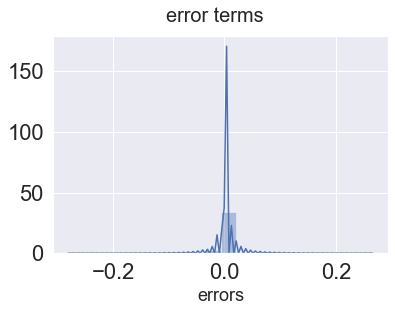

In [68]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [69]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [70]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [71]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [72]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'SEM', 'Other',
       'Affiliates', 'GMV_lag_1_per', 'GMV_lag_2_per',
       'product_analytic_vertical_GamingSpeaker', 'ItemType_MassMarket'],
      dtype='object')

In [73]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Other', 'GMV_lag_1_per',
       'GMV_lag_2_per', 'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [74]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [75]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Other', 'GMV_lag_1_per',
       'GMV_lag_2_per', 'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [76]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    32043 non-null  float64
 1   product_mrp                              32043 non-null  float64
 2   Discount_Percentage                      32043 non-null  float64
 3   Other                                    32043 non-null  float64
 4   GMV_lag_1_per                            32043 non-null  float64
 5   GMV_lag_2_per                            32043 non-null  float64
 6   product_analytic_vertical_GamingSpeaker  32043 non-null  uint8  
dtypes: float64(6), uint8(1)
memory usage: 1.7 MB


In [77]:
# Making predictions
y_pred = lm_10.predict(X_test_rfe2)

In [78]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 7)
(74767, 7)


Text(0, 0.5, 'y_pred')

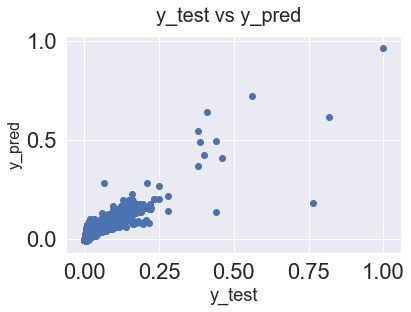

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8479341279675022

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [82]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.008674467660357862

In [83]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [84]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
regr.score(X_test, y_test)

0.8945451920136107

In [86]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.91414254 0.90923244 0.88759446 0.90202296 0.91101743]
Mean and std deviation:  0.90480196505512 0.00947975184547373


0.8945451920136107